In [1]:
import os
import json
import numpy as np
import pandas as pd
import os.path as op
from core import in_CI, rsquared
from scipy.stats import spearmanr, pearsonr

In [2]:
def Cas9_results(path):
    with open(path, "r") as ih:
        data = json.load(ih)
    CI = in_CI(data["y"], data["y_hat"], data["y_hat_std"]).mean()
    pearson = pearsonr(data["y"], data["y_hat"])
    spearman = spearmanr(data["y"], data["y_hat"])
    rsq = rsquared(data["y"], data["y_hat"])
    results = pd.DataFrame(CI).T
    results["PCC"] = [pearson[0]]
    results["PCC-pval"] = [pearson[1]]
    results["SCC"] = [spearman[0]]
    results["SCC-pval"] = [spearman[1]]
    results["rsquared"] = [rsq]
    results.index = [path]
    return(results)

In [3]:
def DeepCpf1_results(path):
    with open(path, "r") as ih:
        data = json.load(ih)
    r = []
    for a in ["H1", "H2", "H3"]:
        CI = in_CI(
            data["y_"+a], data["y_hat_"+a], data["y_hat_std_"+a]
        ).mean()
        pearson = pearsonr(data["y_"+a], data["y_hat_"+a])
        spearman = spearmanr(data["y_"+a], data["y_hat_"+a])
        rsq = rsquared(data["y_"+a], data["y_hat_"+a])
        results = pd.DataFrame(CI).T
        results["PCC"] = [pearson[0]]
        results["PCC-pval"] = [pearson[1]]
        results["SCC"] = [spearman[0]]
        results["SCC-pval"] = [spearman[1]]
        results["rsquared"] = [rsq]
        results.index = [path+":"+a]
        r.append(results)
    r = pd.concat(r)
    return(r)

In [4]:
gecrispr_cm = list(
    filter(
        lambda x: "-u" in x and "CNN" in x, 
        [a for a in os.walk("../models/geCRISPR_CV/")][0][2]
    )
)
gecrispr_rm = list(
    filter(
        lambda x: "-u" in x and "RNN" in x, 
        [a for a in os.walk("../models/geCRISPR_CV/")][0][2]
    )
)
gecrispr_ce = list(
    filter(
        lambda x: "-u" not in x and "CNN" in x, 
        [a for a in os.walk("../models/geCRISPR_CV/")][0][2]
    )
)
gecrispr_re = list(
    filter(
        lambda x: "-u" not in x and "RNN" in x, 
        [a for a in os.walk("../models/geCRISPR_CV/")][0][2]
    )
)

In [5]:
gecrispr_cm_ = pd.concat(
    [Cas9_results(op.join("../models/geCRISPR_CV/", a)) for a in gecrispr_cm]
)
gecrispr_rm_ = pd.concat(
    [Cas9_results(op.join("../models/geCRISPR_CV/", a)) for a in gecrispr_rm]
)
gecrispr_ce_ = pd.concat(
    [Cas9_results(op.join("../models/geCRISPR_CV/", a)) for a in gecrispr_ce]
)
gecrispr_re_ = pd.concat(
    [Cas9_results(op.join("../models/geCRISPR_CV/", a)) for a in gecrispr_re]
)

In [6]:
gecrispr_ = pd.DataFrame(
    {
        "geCRISPR C E+M mean": gecrispr_cm_.mean().round(4).values, 
        "geCRISPR C E+M std": gecrispr_cm_.std().round(4).values,
        "geCRISPR R E+M mean": gecrispr_rm_.mean().round(4).values, 
        "geCRISPR R E+M std": gecrispr_rm_.std().round(4).values,
        "geCRISPR C E mean": gecrispr_ce_.mean().round(4).values, 
        "geCRISPR C E std": gecrispr_ce_.std().round(4).values,
        "geCRISPR R E mean": gecrispr_re_.mean().round(4).values, 
        "geCRISPR R E std": gecrispr_re_.std().round(4).values,
    }
).T
gecrispr_.columns = gecrispr_re_.columns

In [7]:
deephf_wt_cm = list(
    filter(
        lambda x: "-u" in x and "CNN" in x and "json" in x, 
        [a for a in os.walk("../models/DeepHF_CV/WT/")][0][2]
    )
)
deephf_wt_rm = list(
    filter(
        lambda x: "-u" in x and "RNN" in x and "json" in x, 
        [a for a in os.walk("../models/DeepHF_CV/WT/")][0][2]
    )
)
deephf_wt_ce = list(
    filter(
        lambda x: "-u" not in x and "CNN" in x and "json" in x, 
        [a for a in os.walk("../models/DeepHF_CV/WT/")][0][2]
    )
)
deephf_wt_re = list(
    filter(
        lambda x: "-u" not in x and "RNN" in x and "json" in x, 
        [a for a in os.walk("../models/DeepHF_CV/WT/")][0][2]
    )
)
deephf_eSpCas9_cm = list(
    filter(
        lambda x: "-u" in x and "CNN" in x and "json" in x, 
        [a for a in os.walk("../models/DeepHF_CV/eSpCas9/")][0][2]
    )
)
deephf_eSpCas9_rm = list(
    filter(
        lambda x: "-u" in x and "RNN" in x and "json" in x, 
        [a for a in os.walk("../models/DeepHF_CV/eSpCas9/")][0][2]
    )
)
deephf_eSpCas9_ce = list(
    filter(
        lambda x: "-u" not in x and "CNN" in x and "json" in x, 
        [a for a in os.walk("../models/DeepHF_CV/eSpCas9/")][0][2]
    )
)
deephf_eSpCas9_re = list(
    filter(
        lambda x: "-u" not in x and "RNN" in x and "json" in x, 
        [a for a in os.walk("../models/DeepHF_CV/eSpCas9/")][0][2]
    )
)
deephf_SpCas9HF1_cm = list(
    filter(
        lambda x: "-u" in x and "CNN" in x and "json" in x, 
        [a for a in os.walk("../models/DeepHF_CV/SpCas9HF1/")][0][2]
    )
)
deephf_SpCas9HF1_rm = list(
    filter(
        lambda x: "-u" in x and "RNN" in x and "json" in x, 
        [a for a in os.walk("../models/DeepHF_CV/SpCas9HF1/")][0][2]
    )
)
deephf_SpCas9HF1_ce = list(
    filter(
        lambda x: "-u" not in x and "CNN" in x and "json" in x, 
        [a for a in os.walk("../models/DeepHF_CV/SpCas9HF1/")][0][2]
    )
)
deephf_SpCas9HF1_re = list(
    filter(
        lambda x: "-u" not in x and "RNN" in x and "json" in x, 
        [a for a in os.walk("../models/DeepHF_CV/SpCas9HF1/")][0][2]
    )
)

In [8]:
deephf_wt_cm_ = pd.concat(
    [Cas9_results(op.join("../models/DeepHF_CV/WT/", a)) for a in deephf_wt_cm]
)
deephf_wt_rm_ = pd.concat(
    [Cas9_results(op.join("../models/DeepHF_CV/WT/", a)) for a in deephf_wt_rm]
)
deephf_wt_ce_ = pd.concat(
    [Cas9_results(op.join("../models/DeepHF_CV/WT/", a)) for a in deephf_wt_ce]
)
deephf_wt_re_ = pd.concat(
    [Cas9_results(op.join("../models/DeepHF_CV/WT/", a)) for a in deephf_wt_re]
)
deephf_eSpCas9_cm_ = pd.concat(
    [Cas9_results(op.join("../models/DeepHF_CV/eSpCas9/", a)) for a in deephf_eSpCas9_cm]
)
deephf_eSpCas9_rm_ = pd.concat(
    [Cas9_results(op.join("../models/DeepHF_CV/eSpCas9/", a)) for a in deephf_eSpCas9_rm]
)
deephf_eSpCas9_ce_ = pd.concat(
    [Cas9_results(op.join("../models/DeepHF_CV/eSpCas9/", a)) for a in deephf_eSpCas9_ce]
)
deephf_eSpCas9_re_ = pd.concat(
    [Cas9_results(op.join("../models/DeepHF_CV/eSpCas9/", a)) for a in deephf_eSpCas9_re]
)
deephf_SpCas9HF1_cm_ = pd.concat(
    [Cas9_results(op.join("../models/DeepHF_CV/SpCas9HF1/", a)) for a in deephf_SpCas9HF1_cm]
)
deephf_SpCas9HF1_rm_ = pd.concat(
    [Cas9_results(op.join("../models/DeepHF_CV/SpCas9HF1/", a)) for a in deephf_SpCas9HF1_rm]
)
deephf_SpCas9HF1_ce_ = pd.concat(
    [Cas9_results(op.join("../models/DeepHF_CV/SpCas9HF1/", a)) for a in deephf_SpCas9HF1_ce]
)
deephf_SpCas9HF1_re_ = pd.concat(
    [Cas9_results(op.join("../models/DeepHF_CV/SpCas9HF1/", a)) for a in deephf_SpCas9HF1_re]
)

/home/bakirillov/anaconda3/envs/lapki/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/bakirillov/anaconda3/envs/lapki/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [9]:
deephf_wt_ = pd.DataFrame(
    {
        "DeepHF WT C E+M mean": deephf_wt_cm_.mean().round(4).values, 
        "DeepHF WT C E+M std": deephf_wt_cm_.std().round(4).values, 
        "DeepHF WT R E+M mean": deephf_wt_rm_.mean().round(4).values, 
        "DeepHF WT R E+M std": deephf_wt_rm_.std().round(4).values, 
        "DeepHF WT C E mean": deephf_wt_ce_.mean().round(4).values, 
        "DeepHF WT C E std": deephf_wt_ce_.std().round(4).values, 
        "DeepHF WT R E mean": deephf_wt_re_.mean().round(4).values, 
        "DeepHF WT R E std": deephf_wt_re_.std().round(4).values,
        "DeepHF eSpCas9 C E+M mean": deephf_eSpCas9_cm_.mean().round(4).values, 
        "DeepHF eSpCas9 C E+M std": deephf_eSpCas9_cm_.std().round(4).values, 
        "DeepHF eSpCas9 R E+M mean": deephf_eSpCas9_rm_.mean().round(4).values, 
        "DeepHF eSpCas9 R E+M std": deephf_eSpCas9_rm_.std().round(4).values, 
        "DeepHF eSpCas9 C E mean": deephf_eSpCas9_ce_.mean().round(4).values, 
        "DeepHF eSpCas9 C E std": deephf_eSpCas9_ce_.std().round(4).values,  
        "DeepHF eSpCas9 R E mean": deephf_eSpCas9_re_.mean().round(4).values, 
        "DeepHF eSpCas9 R E std": deephf_eSpCas9_re_.std().round(4).values,  
        "DeepHF SpCas9-HF1 C v mean": deephf_SpCas9HF1_cm_.mean().round(4).values, 
        "DeepHF SpCas9-HF1 C E+M std": deephf_SpCas9HF1_cm_.std().round(4).values,
        "DeepHF SpCas9-HF1 R E+M mean": deephf_SpCas9HF1_rm_.mean().round(4).values, 
        "DeepHF SpCas9-HF1 R E+M std": deephf_SpCas9HF1_rm_.std().round(4).values,  
        "DeepHF SpCas9-HF1 C E mean": deephf_SpCas9HF1_ce_.mean().round(4).values, 
        "DeepHF SpCas9-HF1 C E std": deephf_SpCas9HF1_ce_.std().round(4).values,
        "DeepHF SpCas9-HF1 R E mean": deephf_SpCas9HF1_re_.mean().round(4).values, 
        "DeepHF SpCas9-HF1 R E std": deephf_SpCas9HF1_re_.std().round(4).values,  
    }
).T
deephf_wt_.columns = deephf_wt_rm_.columns

In [10]:
cpf1_off_m = list(
    filter(
        lambda x: "-u" in x and "json" in x, 
        [a for a in os.walk("../models/Cpf1_offtargets_CV/")][0][2]
    )
)
cpf1_off_e = list(
    filter(
        lambda x: "-u" not in x and "json" in x, 
        [a for a in os.walk("../models/Cpf1_offtargets_CV/")][0][2]
    )
)

In [11]:
cpf_off_m_ = pd.concat(
    [Cas9_results(op.join("../models/Cpf1_offtargets_CV/", a)) for a in cpf1_off_m]
)
cpf_off_e_ = pd.concat(
    [Cas9_results(op.join("../models/Cpf1_offtargets_CV/", a)) for a in cpf1_off_e]
)

In [12]:
cpf_off_ = pd.DataFrame(
    {
        "Cpf1 off-targets MSE mean": cpf_off_m_.mean().round(4).values, 
        "Cpf1 off-targets MSE std": cpf_off_m_.std().round(4).values, 
        "Cpf1 off-targets ELBO mean": cpf_off_e_.mean().round(4).values, 
        "Cpf1 off-targets ELBO std": cpf_off_e_.std().round(4).values, 
    }
).T
cpf_off_.columns = cpf_off_m_.columns

In [13]:
cpf1_cnns_elbos = list(
    filter(
        lambda x: "-u" not in x and "CNN" in x, 
        [a for a in os.walk("../models/DeepCpf1_CV/")][0][2]
    )
)
cpf1_cnns_mses = list(
    filter(
        lambda x: "-u" in x and "CNN" in x, 
        [a for a in os.walk("../models/DeepCpf1_CV/")][0][2]
    )
)
cpf1_rnns_elbos = list(
    filter(
        lambda x: "-u" not in x and "RNN" in x and "json" in x, 
        [a for a in os.walk("../models/DeepCpf1_CV/")][0][2]
    )
)
cpf1_rnns_mses = list(
    filter(
        lambda x: "-u" in x and "RNN" in x, 
        [a for a in os.walk("../models/DeepCpf1_CV/")][0][2]
    )
)

In [14]:
deepcpf1_ce = pd.concat(
    [DeepCpf1_results(op.join("../models/DeepCpf1_CV/", a)) for a in cpf1_cnns_elbos]
)
deepcpf1_cm = pd.concat(
    [DeepCpf1_results(op.join("../models/DeepCpf1_CV/", a)) for a in cpf1_cnns_mses]
)
deepcpf1_re = pd.concat(
    [DeepCpf1_results(op.join("../models/DeepCpf1_CV/", a)) for a in cpf1_rnns_elbos]
)
deepcpf1_rm = pd.concat(
    [DeepCpf1_results(op.join("../models/DeepCpf1_CV/", a)) for a in cpf1_rnns_mses]
)
deepcpf1 = pd.DataFrame(
    {
        "DeepCpf1 C E mean": deepcpf1_ce.mean().round(4).values, 
        "DeepCpf1 C E std": deepcpf1_ce.std().round(4).values,
        "DeepCpf1 C E+M mean": deepcpf1_cm.mean().round(4).values, 
        "DeepCpf1 C E+M std": deepcpf1_cm.std().round(4).values,
        "DeepCpf1 R E mean": deepcpf1_re.mean().round(4).values, 
        "DeepCpf1 R E std": deepcpf1_re.std().round(4).values,
        "DeepCpf1 R E+M mean": deepcpf1_rm.mean().round(4).values, 
        "DeepCpf1 R E+M std": deepcpf1_rm.std().round(4).values,
    }
).T
deepcpf1.columns = deepcpf1_rm.columns

In [15]:
cas9_off_elbos = list(
    filter(
        lambda x: "-u" not in x, 
        [a for a in os.walk("../models/JostEtAl_CV/")][0][2]
    )
)
cas9_off_mses = list(
    filter(
        lambda x: "-u" in x, 
        [a for a in os.walk("../models/JostEtAl_CV//")][0][2]
    )
)

In [16]:
cas9_off_e = pd.concat([Cas9_results(op.join("../models/JostEtAl_CV", a)) for a in cas9_off_elbos])
cas9_off_m = pd.concat([Cas9_results(op.join("../models/JostEtAl_CV", a)) for a in cas9_off_mses])

In [24]:
cas9_off_ = pd.DataFrame(
    {
        "Jost et al. ELBO mean": cas9_off_e.mean().round(4).values, 
        "Jost et al. ELBO std": cas9_off_e.std().round(4).values,
        "Jost et al. MSE mean": cas9_off_m.mean().round(4).values, 
        "Jost et al. MSE std": cas9_off_m.std().round(4).values,
    }
).T
cas9_off_.columns = cas9_off_e.columns

In [25]:
ST7 = pd.concat([cas9_off_, deepcpf1, cpf_off_, gecrispr_, deephf_wt_])

In [27]:
ST7

,0.68,0.95,0.997,PCC,PCC-pval,SCC,SCC-pval,rsquared
Jost et al. ELBO mean,0.6746,0.8739,0.9613,0.7696,0.0000,0.6951,0.0000,0.5927
Jost et al. ELBO std,0.0311,0.0317,0.0149,0.0209,0.0000,0.0249,0.0000,0.0320
Jost et al. MSE mean,0.6738,0.8760,0.9619,0.7683,0.0000,0.6927,0.0000,0.5906
Jost et al. MSE std,0.0299,0.0303,0.0128,0.0182,0.0000,0.0236,0.0000,0.0279
DeepCpf1 C E mean,0.6606,0.9115,0.9859,0.5513,0.0000,0.5127,0.0000,0.3081
DeepCpf1 C E std,0.1343,0.0545,0.0129,0.0660,0.0000,0.0874,0.0000,0.0770
DeepCpf1 C E+M mean,0.6550,0.9116,0.9841,0.5528,0.0000,0.5165,0.0000,0.3092
DeepCpf1 C E+M std,0.1327,0.0554,0.0152,0.0614,0.0000,0.0825,0.0000,0.0718
DeepCpf1 R E mean,0.7065,0.9492,0.9939,0.5460,0.0304,0.5056,0.0275,0.3139
DeepCpf1 R E std,0.1128,0.0325,0.0053,0.1278,0.1608,0.1339,0.1456,0.1018


In [60]:
cnn_means = ST7[["mean" in a and " C" in a for a in ST7.index]]
rnn_means = ST7[["mean" in a and " R" in a for a in ST7.index]]

In [41]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

In [48]:
rcParams["figure.figsize"] = (30,3)

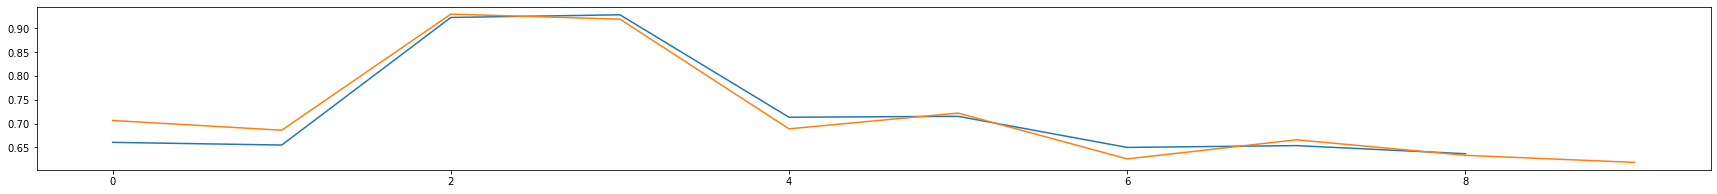

In [55]:
plt.plot(cnn_means["0.68"].values)
plt.plot(rnn_means["0.68"].values)

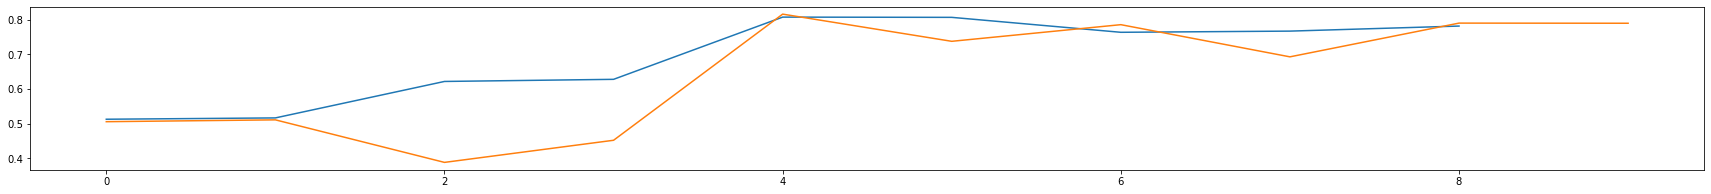

In [56]:
plt.plot(cnn_means["SCC"].values)
plt.plot(rnn_means["SCC"].values)

In [61]:
cnn_means

,0.68,0.95,0.997,PCC,PCC-pval,SCC,SCC-pval,rsquared
DeepCpf1 C E mean,0.6606,0.9115,0.9859,0.5513,0.0,0.5127,0.0,0.3081
DeepCpf1 C E+M mean,0.6550,0.9116,0.9841,0.5528,0.0,0.5165,0.0,0.3092
geCRISPR C E+M mean,0.9226,0.9994,1.0000,0.5926,0.0,0.6217,0.0,0.3600
geCRISPR C E mean,0.9282,0.9997,1.0000,0.5946,0.0,0.6278,0.0,0.3601
DeepHF WT C E+M mean,0.7133,0.9152,0.9713,0.8273,0.0,0.8073,0.0,0.6852
DeepHF WT C E mean,0.7152,0.9147,0.9698,0.8278,0.0,0.8066,0.0,0.6860
DeepHF eSpCas9 C E+M mean,0.6500,0.9098,0.9804,0.7635,0.0,0.7635,0.0,0.5847
DeepHF eSpCas9 C E mean,0.6538,0.9129,0.9819,0.7664,0.0,0.7669,0.0,0.5889
DeepHF SpCas9-HF1 C v mean,0.6342,0.9087,0.9799,0.7976,0.0,0.7829,0.0,0.6372
DeepHF SpCas9-HF1 C E mean,0.6368,0.9106,0.9808,0.7966,0.0,0.7815,0.0,0.6358


In [63]:
rnn_means

,0.68,0.95,0.997,PCC,PCC-pval,SCC,SCC-pval,rsquared
DeepCpf1 R E mean,0.7065,0.9492,0.9939,0.5460,0.0304,0.5056,0.0275,0.3139
DeepCpf1 R E+M mean,0.6861,0.9292,0.9906,0.5584,0.0000,0.5109,0.0000,0.3160
geCRISPR R E+M mean,0.9296,1.0000,1.0000,0.3929,0.1082,0.3882,0.1903,0.2270
geCRISPR R E mean,0.9191,1.0000,1.0000,0.4403,0.0205,0.4520,0.0181,0.2335
DeepHF WT R E+M mean,0.6890,0.8992,0.9632,0.8381,0.0000,0.8159,0.0000,0.7033
DeepHF WT R E mean,0.7220,0.9134,0.9692,0.7575,0.0108,0.7375,0.0036,0.6348
DeepHF eSpCas9 R E+M mean,0.6259,0.9047,0.9787,0.7830,0.0000,0.7855,0.0000,0.6134
DeepHF eSpCas9 R E mean,0.6660,0.9352,0.9884,0.6913,0.0796,0.6927,0.0956,0.5381
DeepHF SpCas9-HF1 R E+M mean,0.6334,0.9064,0.9789,0.8063,0.0000,0.7900,0.0000,0.6504
DeepHF SpCas9-HF1 R E mean,0.6186,0.8975,0.9757,0.8055,0.0000,0.7896,0.0000,0.6494


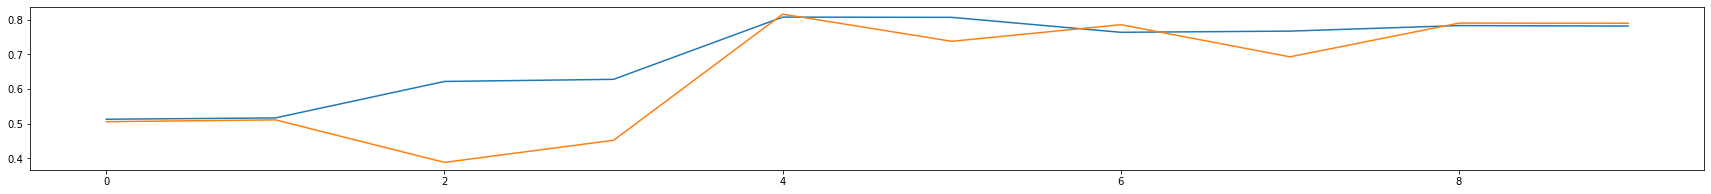

In [53]:
plt.plot(cnn_means["SCC"].values)
plt.plot(rnn_means["SCC"].values)

,0.68,0.95,0.997,PCC,PCC-pval,SCC,SCC-pval,rsquared
DeepCpf1 R E mean,0.7065,0.9492,0.9939,0.5460,0.0304,0.5056,0.0275,0.3139
DeepCpf1 R E+M mean,0.6861,0.9292,0.9906,0.5584,0.0000,0.5109,0.0000,0.3160
geCRISPR R E+M mean,0.9296,1.0000,1.0000,0.3929,0.1082,0.3882,0.1903,0.2270
geCRISPR R E mean,0.9191,1.0000,1.0000,0.4403,0.0205,0.4520,0.0181,0.2335
DeepHF WT R E+M mean,0.6890,0.8992,0.9632,0.8381,0.0000,0.8159,0.0000,0.7033
DeepHF WT R E mean,0.7220,0.9134,0.9692,0.7575,0.0108,0.7375,0.0036,0.6348
DeepHF eSpCas9 R E+M mean,0.6259,0.9047,0.9787,0.7830,0.0000,0.7855,0.0000,0.6134
DeepHF eSpCas9 R E mean,0.6660,0.9352,0.9884,0.6913,0.0796,0.6927,0.0956,0.5381
DeepHF SpCas9-HF1 R E+M mean,0.6334,0.9064,0.9789,0.8063,0.0000,0.7900,0.0000,0.6504
DeepHF SpCas9-HF1 R E mean,0.6186,0.8975,0.9757,0.8055,0.0000,0.7896,0.0000,0.6494


In [20]:
ST7.to_excel("ST7.xlsx")

In [21]:
st7_means = ST7[["mean" in a for a in ST7.index]]

In [22]:
st7_stds = ST7[["std" in a for a in ST7.index]]

In [23]:
st7_means

,0.68,0.95,0.997,PCC,PCC-pval,SCC,SCC-pval,rsquared
Jost et al ELBO mean,0.6746,0.8739,0.9613,0.7696,0.0000,0.6951,0.0000,0.5927
Jost et al MSE mean,0.6738,0.8760,0.9619,0.7683,0.0000,0.6927,0.0000,0.5906
DeepCpf1 C E mean,0.6606,0.9115,0.9859,0.5513,0.0000,0.5127,0.0000,0.3081
DeepCpf1 C E+M mean,0.6550,0.9116,0.9841,0.5528,0.0000,0.5165,0.0000,0.3092
DeepCpf1 R E mean,0.7065,0.9492,0.9939,0.5460,0.0304,0.5056,0.0275,0.3139
DeepCpf1 R E+M mean,0.6861,0.9292,0.9906,0.5584,0.0000,0.5109,0.0000,0.3160
Cpf1 off-targets MSE mean,0.2788,0.4368,0.6178,0.1167,0.3939,0.0916,0.4373,0.0730
Cpf1 off-targets ELBO mean,0.2731,0.4349,0.6178,0.1071,0.4126,0.0838,0.3623,0.0734
geCRISPR C E+M mean,0.9226,0.9994,1.0000,0.5926,0.0000,0.6217,0.0000,0.3600
geCRISPR R E+M mean,0.9296,1.0000,1.0000,0.3929,0.1082,0.3882,0.1903,0.2270
